### Import

In [3]:
# necessary imports for the descriptive statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pylab
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

### General description

The following dataset is the rain and temperature data from January to December for the period of 1961-2000, which is from four county meteorological stations representing Mengla, Menglun, Menghai, Jinghong:

#### Variable tag description:
- Mla=Mengla;  Mlun=Menglun;  Mhai=Menghai;  Jhong=Jinghong.
- R=monthly rainfall; AT=monthly temperature; 01,02,...,12 means 12 months from January to December.

In [4]:
import pandas as pd
df=pd.read_csv('C:/Users/Administrator/Desktop/Python/exercise/WeatherData(1961-2000)/Rain and Temperature Data.csv',header=0)
df.head()

,MlaR01,MlaR02,MlaR03,MlaR04,MlaR05,MlaR06,MlaR07,MlaR08,MlaR09,MlaR10,...,JhongAT3,JhongAT4,JhongAT5,JhongAT6,JhongAT7,JhongAT8,JhongAT9,JhongAT10,JhongAT11,JhongAT12
0,4.8,46.8,41.4,97.7,262.8,205.4,215.5,415.2,245.1,21.5,...,21.3,24.2,25.8,26.0,25.6,24.8,24.1,22.9,19.0,16.7
1,12.9,45.0,16.8,105.3,166.0,258.6,91.0,330.9,93.0,115.8,...,19.4,24.4,26.1,25.1,25.6,24.5,23.9,22.1,18.8,15.4
2,3.3,5.2,42.0,114.7,90.0,314.1,363.8,350.6,72.9,228.1,...,20.4,24.0,26.3,25.9,25.3,24.6,25.0,22.0,19.4,15.4
3,6.1,9.7,46.5,88.7,125.4,335.7,448.6,241.5,104.6,155.6,...,20.5,23.7,24.8,25.1,24.2,24.9,24.7,23.3,18.8,15.1
4,19.2,28.3,19.8,44.1,176.2,228.2,340.3,235.8,194.2,128.6,...,20.2,24.3,25.9,25.3,25.4,24.3,24.1,22.2,18.5,17.4


### Example:  The Mla weather dataset

The following shows all the monthly rain and air temperature data for the period of 1961-2000 in Mla:

In [5]:
# rows and columns can be retrieved by location using .iloc[]
# get rows from 0 to 40, and columns from 0 to 24
Mla=df.iloc[:40,0:24]
Mla.head() # show the first 5 years' data

,MlaR01,MlaR02,MlaR03,MlaR04,MlaR05,MlaR06,MlaR07,MlaR08,MlaR09,MlaR10,...,MlaAT03,MlaAT04,MlaAT05,MlaAT06,MlaAT07,MlaAT08,MlaAT09,MlaAT10,MlaAT11,MlaAT12
0,4.8,46.8,41.4,97.7,262.8,205.4,215.5,415.2,245.1,21.5,...,20.5,22.9,24.5,24.4,24.8,24.2,23.6,22.2,18.7,16.2
1,12.9,45.0,16.8,105.3,166.0,258.6,91.0,330.9,93.0,115.8,...,18.0,22.5,24.4,24.5,25.1,24.4,23.4,21.4,18.6,14.7
2,3.3,5.2,42.0,114.7,90.0,314.1,363.8,350.6,72.9,228.1,...,18.8,21.9,24.3,24.6,24.7,24.0,24.4,21.4,19.2,15.3
3,6.1,9.7,46.5,88.7,125.4,335.7,448.6,241.5,104.6,155.6,...,19.7,22.4,24.0,24.4,23.8,24.2,23.6,22.7,17.8,14.7
4,19.2,28.3,19.8,44.1,176.2,228.2,340.3,235.8,194.2,128.6,...,18.8,22.6,24.3,24.3,24.4,23.6,23.2,21.6,18.1,16.9


### Correlation plot:

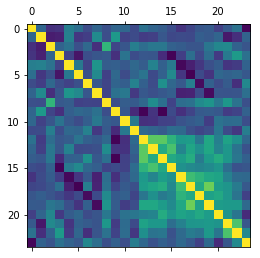

In [6]:
Mla.corr()
plt.matshow(Mla.corr())

Something wrong?

#### The Mla Rainfall data:

In [7]:
MlaR=df.iloc[:40,0:12]
MlaR.head()

,MlaR01,MlaR02,MlaR03,MlaR04,MlaR05,MlaR06,MlaR07,MlaR08,MlaR09,MlaR10,MlaR11,MlaR12
0,4.8,46.8,41.4,97.7,262.8,205.4,215.5,415.2,245.1,21.5,47.9,53.6
1,12.9,45.0,16.8,105.3,166.0,258.6,91.0,330.9,93.0,115.8,12.3,5.4
2,3.3,5.2,42.0,114.7,90.0,314.1,363.8,350.6,72.9,228.1,101.9,11.3
3,6.1,9.7,46.5,88.7,125.4,335.7,448.6,241.5,104.6,155.6,33.4,47.1
4,19.2,28.3,19.8,44.1,176.2,228.2,340.3,235.8,194.2,128.6,140.2,68.7


#### The Mla Temperature data:

In [8]:
MlaAT=df.iloc[:40,12:24]
MlaAT.head()

,MlaAT01,MlaAT02,MlaAT03,MlaAT04,MlaAT05,MlaAT06,MlaAT07,MlaAT08,MlaAT09,MlaAT10,MlaAT11,MlaAT12
0,15.8,18.7,20.5,22.9,24.5,24.4,24.8,24.2,23.6,22.2,18.7,16.2
1,14.8,16.4,18.0,22.5,24.4,24.5,25.1,24.4,23.4,21.4,18.6,14.7
2,13.2,16.0,18.8,21.9,24.3,24.6,24.7,24.0,24.4,21.4,19.2,15.3
3,15.7,16.7,19.7,22.4,24.0,24.4,23.8,24.2,23.6,22.7,17.8,14.7
4,14.3,16.7,18.8,22.6,24.3,24.3,24.4,23.6,23.2,21.6,18.1,16.9


### QQ plot:

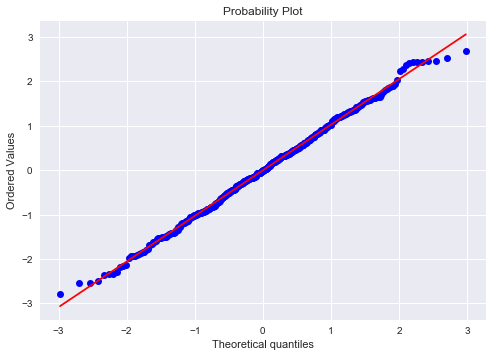

In [61]:
import scipy.stats as stats
plt.figure()
plt.title('QQ plot')
sample_data = Mla
sample_data = np.random.normal(size=480)
graph1 = stats.probplot(sample_data, dist="norm", plot=plt)

### Scatter plot:

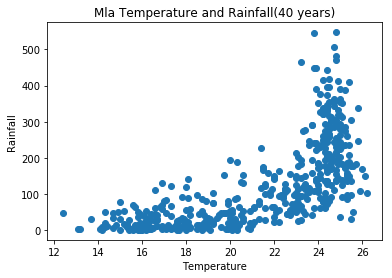

In [10]:
plt.scatter(MlaAT, MlaR)
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Mla Temperature and Rainfall(40 years)')
plt.show()

The scatter plot shows that there is a correlation between the rainfall and temperature. 

In [11]:
X=MlaAT.mean()
X

MlaAT01    15.7750
MlaAT02    17.3975
MlaAT03    20.0750
MlaAT04    22.9175
MlaAT05    24.6000
MlaAT06    25.0475
MlaAT07    24.7600
MlaAT08    24.5225
MlaAT09    23.9400
MlaAT10    22.1725
MlaAT11    19.0775
MlaAT12    15.9025
dtype: float64

In [12]:
Y=MlaR.mean()
Y

MlaR01     19.5625
MlaR02     22.6975
MlaR03     37.5500
MlaR04     96.3525
MlaR05    167.6575
MlaR06    225.6800
MlaR07    303.8600
MlaR08    308.0700
MlaR09    158.2900
MlaR10     93.9275
MlaR11     54.0475
MlaR12     29.5425
dtype: float64

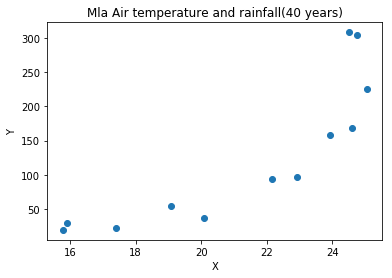

In [15]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mla Air temperature and rainfall(40 years)')
plt.show()

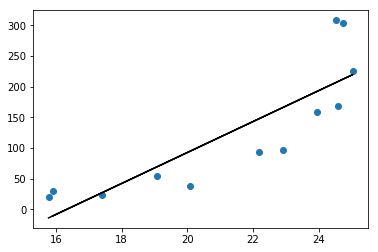

In [16]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X, Y)

predict_Y= intercept + slope * X
pred_error = Y - predict_Y
degrees_of_freedom = len(X) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plotting
pylab.plot(X, Y, 'o')
pylab.plot(X, predict_Y, 'k-')
pylab.show()

### Using PyMC3:

### Model specification:

In [45]:
from pymc3 import Model, Normal,HalfNormal
# The following code implements the model in PyMC3: 
basic_model = Model()
with basic_model:
    # Priors for unknown model parameters
    intercept = Normal('intercept',mu=0, sd=10) #mu:mean ; sd:standard deviation; 
    slope = Normal('slope',mu=0, sd=10, shape=1)#shape:the length or shape of the variable
    sigma=HalfNormal('sigma',sd=1)
    # Expected value of outcome
    mu = intercept + slope*X + sigma
    
    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs',mu=mu, sd=sigma, observed=Y)

### Model fitting:
#### MAP:

In [46]:
from pymc3 import find_MAP
map_estimate=find_MAP(model=basic_model)
print(map_estimate)

Optimization terminated successfully.
         Current function value: 340.258018
         Iterations: 41
         Function evaluations: 52
         Gradient evaluations: 52
{'intercept': array(-41.63538885470789), 'slope': array([ 7.54251035]), 'sigma_log__': array(2.806193741960097)}


#### Gradient-based sampling methods:

In [47]:
from scipy import optimize
map_estimate = find_MAP(model=basic_model, fmin=optimize.fmin_powell)
print(map_estimate)

Optimization terminated successfully.
         Current function value: 340.258018
         Iterations: 5
         Function evaluations: 176
{'intercept': array(-41.63136326408326), 'slope': array([ 7.54254437]), 'sigma_log__': array(2.8061867663201343)}


In [48]:
from pymc3 import NUTS, sample
with basic_model:
    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)
    # instantiate sampler
    step = NUTS(scaling=start)
    # draw 2000 posterior samples
    trace = sample(2000, step, start=start)

Optimization terminated successfully.
         Current function value: 340.258018
         Iterations: 5
         Function evaluations: 176


100%|██████████████████████████████████████| 2500/2500 [01:50<00:00, 19.46it/s]


In [49]:
trace['intercept'][-5:] #extract the last 5 values for the intercept variable.

array([-40.84401109, -50.57523012, -39.91464832, -42.82403796, -31.67888413])

#### Posterior analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AC3F070>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0F805490>]], dtype=object)

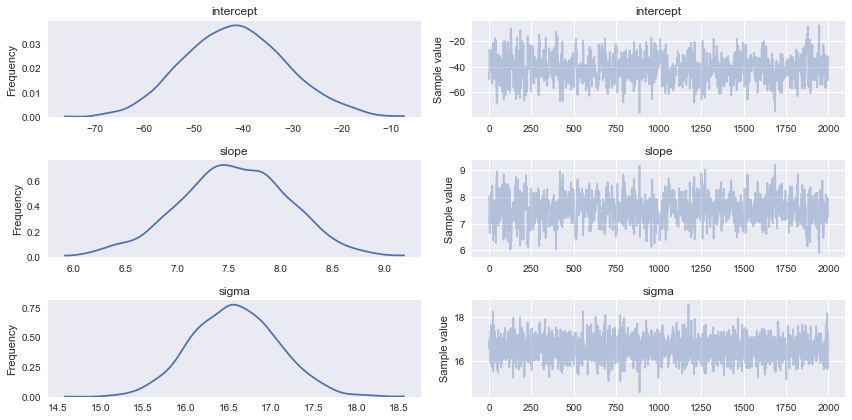

In [50]:
from pymc3 import traceplot
traceplot(trace)

In [51]:
from pymc3 import summary
summary(trace)


intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -41.563          10.423           0.446            [-61.477, -20.871]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -60.959        -48.608        -41.668        -34.529        -20.142


slope:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.542            0.529            0.022            [6.402, 8.510]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  6.437          7.202          7.540          7.890          8.558


sigma:

  Mean             SD               MC Error         95% HPD interval
  ---------------

### Some try with OLS regression:

#### Linear Regression on Mla:

In [52]:
import random
import scipy as sp
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Predicting Mla Temperature

In [53]:
n = len(Mla)
Mla_train = np.random.rand(n) < 0.7
train = Mla[Mla_train].reset_index(drop=True)
test = Mla[Mla_train].reset_index(drop=True)

In [55]:
lin_model = smf.ols('MlaAT01~MlaR01', train).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MlaAT01   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.5276
Date:                Thu, 12 Oct 2017   Prob (F-statistic):              0.474
Time:                        09:28:56   Log-Likelihood:                -42.709
No. Observations:                  30   AIC:                             89.42
Df Residuals:                      28   BIC:                             92.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7258      0.249     63.036      0.000      15.215      16.237
MlaR01         0.0053      0.007      0.726      0.474      -0.010       0.020
==============================================================================
Omnibus:                        1.168   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.599
Skew:                          -0.344   Prob(JB):                        0.741
Kurtosis:                       3.078   Cond. No.                         45.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lin_model = smf.ols('MlaR01~MlaAT01',train).fit()
lin_model.summary()

#### Testing Accuracy using RMSE

In [56]:
def rmse(y, yhat):
    return np.sum((y - yhat)**2)**0.5

preds = lin_model.predict(test)
print('The RMSE is {}'.format(rmse(test['MlaAT01'], preds)))

The RMSE is 5.503001311662206


#### Expanding model

In [57]:
lin_model = smf.ols('MlaAT01 ~ MlaR01+MlaAT02+MlaAT03+MlaAT04 ', train).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                MlaAT01   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     8.935
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           0.000127
Time:                        09:29:01   Log-Likelihood:                -29.673
No. Observations:                  30   AIC:                             69.35
Df Residuals:                      25   BIC:                             76.35
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2277      4.575     -0.268      0.7

In [58]:
preds = lin_model.predict(test)
print('The RMSE is {}'.format(rmse(test['MlaAT01'], preds)))

The RMSE is 3.5635725518426575


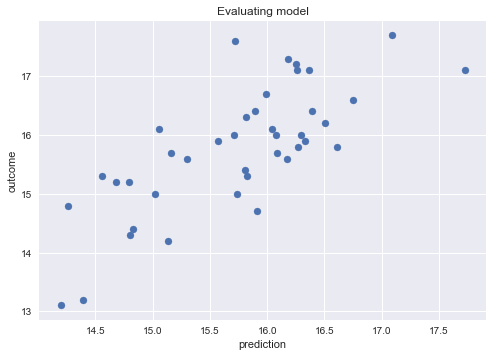

In [59]:
Mla['MlaAT01_hat'] = lin_model.predict(Mla)

f,ax = plt.subplots()

ax.scatter(Mla['MlaAT01_hat'], Mla['MlaAT01'])
ax.set_xlabel('prediction')
ax.set_ylabel('outcome')
ax.set_title('Evaluating model')

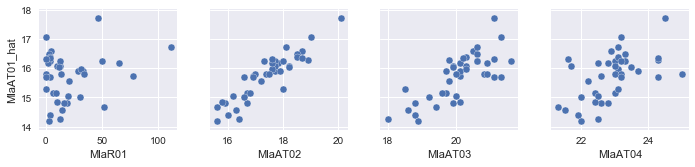

In [60]:
sns.pairplot(Mla, y_vars=['MlaAT01_hat'], x_vars=['MlaR01', 'MlaAT02','MlaAT03','MlaAT04'])